In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import config as creds

In [204]:
# Importing connection dependencies + config
import psycopg2
import config as creds
# def connect():
    # Set up a connection to the postgres server.
conn_string = "host="+ creds.PGHOST +" port="+ "5432" +" dbname="+ creds.PGDATABASE +" user=" + creds.PGUSER \
              +" password=" + creds.PGPASSWORD
conn = psycopg2.connect(conn_string)
print("Connected!")
# Create a cursor object
cursor = conn.cursor()
# return conn, cursor

Connected!


In [118]:
# conn.close()

In [220]:
# Import preprocessed (reduced, encoded, etc) data
# Table Name = ml_table
cursor.execute("SELECT * FROM ml_data")


data = cursor.fetchall()

# Create a dataframe
cols = []
for elt in cursor.description:
    cols.append(elt[0])
        
health_df = pd.DataFrame (data=data,columns=cols)
pd.set_option('display.max_columns', None)
health_df.sample(10)


,GENHLTH,MENTHLTH,PHYSHLTH,SEX,MARITAL_STATUS,EDUCATION,HOME_STATUS,VETERAN,EMPLOYMENT_SITUATION,INTERNET,DISABILITIES?,USEEQUIP,BLIND,ISSUES_DECISION_MAING,DIFFWALK,DIFFDRES,DIFFALON,HEALTHY_ADULTS,HEALTH_CVRAGE,DIABETE3,BLOOD_PRESSURE,_CHOLCHK,HIGH_CHOLESTEROL,CORONARY_DISEASE,ASTHMA_DISEASE,_ASTHMS1,HAS_ARTHRITIS,RACE,AGE_14LEVEL,BMI,BMI_5CAT,CHILDREN2,EDUCATION_LEVEL,INCOME2,DRINKS_WEEK,HEAVY_DRINKER,FRUIT_CONSUMPTION,VEGGIE_COSUMPTION,PHYS_ACTIVITY_MINS,PHYS_CATEGORIES,PHYS_ACT_INDX,AER_STRGTH
205303,2,3,88,2,1,6,1,2,1,1,2,2,2,2,2,2,2,1,1,3,1,1,1,2,1,3,2,4,4,2663,3,3,4,4,0.0,1,2,1,329.0,1,1,1
207614,2,88,3,1,2,5,1,2,2,1,2,2,2,2,2,2,2,1,1,3,2,1,2,2,1,3,2,1,8,2762,3,1,3,5,187.0,1,1,1,160.0,2,1,2
81167,2,10,2,2,2,5,1,2,1,1,2,2,2,2,2,2,2,1,1,3,1,1,2,2,1,3,2,1,7,1837,1,2,3,5,1400.0,2,1,1,480.0,1,1,1
83325,2,15,88,2,1,4,2,2,1,2,2,2,2,1,2,2,2,1,1,3,1,1,1,2,1,3,2,1,5,1931,2,1,2,2,0.0,1,2,1,280.0,2,1,2
122285,1,88,88,1,3,4,1,1,7,2,2,2,2,2,2,2,2,1,99,3,2,1,2,2,1,3,1,1,12,2296,2,1,2,99,0.0,1,1,2,0.0,99,99,99
71861,1,88,88,1,1,6,1,2,4,1,2,2,2,2,2,2,2,1,1,3,1,1,1,2,1,3,2,1,7,2439,2,1,4,5,0.0,1,1,1,378.0,1,1,2
219816,2,10,2,2,1,6,1,2,1,1,2,2,2,2,2,2,2,1,1,3,1,1,2,2,1,3,1,5,8,2441,2,1,4,5,0.0,1,1,1,480.0,1,1,2
214390,2,88,88,2,5,6,3,2,6,2,2,2,2,2,2,2,2,1,99,3,1,1,1,2,1,3,2,1,2,2929,3,2,4,99,0.0,1,2,2,120.0,3,2,4
52175,1,88,88,2,3,6,1,2,2,1,2,2,2,2,2,2,2,1,99,3,1,1,1,2,2,1,2,1,13,2197,2,1,4,4,0.0,1,1,1,2296.0,1,1,1
78683,3,2,88,1,1,4,1,2,2,1,2,2,2,2,2,2,2,1,2,3,1,1,2,2,1,3,2,99,7,3801,4,2,2,5,99.0,99,1,99,14.0,3,2,4


In [232]:
health_df['MENTHLTH'].value_counts()

88    157800
2      11345
30      7792
1       7629
5       7308
3       6273
10      4820
15      4114
4       3156
99      2606
7       2497
20      2422
14       899
6        831
25       831
8        532
12       334
28       223
21       176
29       123
18        76
16        65
27        55
22        44
17        43
13        36
23        33
26        33
11        30
24        27
19        15
Name: MENTHLTH, dtype: int64

## CONVERT BMI TO DECIMALS

In [187]:
health_df['BMI'] = health_df['BMI'].div(100)

health_df['BMI'].sample(10)

182902    24.96
19154     30.90
207411    27.44
173557    21.97
140012    40.35
32807     29.65
160876    27.89
41860     24.69
166968    34.87
65695     27.05
Name: BMI, dtype: float64

In [245]:
health_df['MENTHLTH'].count()

222168

In [123]:
health_df['INCOME2'].unique()

array([ 5, 99,  2,  3,  1,  4], dtype=int64)

## CLEAN COLUMNS TO ELIMINATE OUTLIER DATA POINTS AND CREATE VISUALIZATIONS

In [189]:
health_df['GENHLTH'].count()

health_df['SEX'].replace([1,2],['M','F'], inplace=True)

<AxesSubplot:xlabel='AGE_14LEVEL', ylabel='MENTHLTH'>

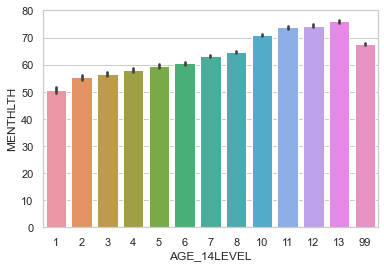

In [253]:
sns.set_theme(style='whitegrid')

line = health_df['AGE_14LEVEL']

values = clean_ment

# Create Seaborn Line plot to determine basic levels of correlation between Mental health and General Health

sns.barplot(x = line, y = health_df['MENTHLTH'], data=health_df)

# Save Image

# plt.savefig('MentByAge.png')

In [258]:
health_df['MENTHLTH'].shape

(222168,)

<AxesSubplot:xlabel='GENHLTH', ylabel='count'>

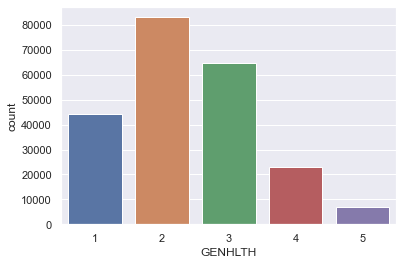

In [132]:
# Set seaborn style for dark background
sns.set(style="darkgrid")
GEN = health_df.GENHLTH[health_df.GENHLTH < 7]
# Plotting counts of General Health survey results (1-Excellent to 5 - Poor)

sns.countplot(x=GEN, data=health_df)

# plt.savefig('GenStats.png')

<AxesSubplot:xlabel='GENHLTH', ylabel='MENTHLTH'>

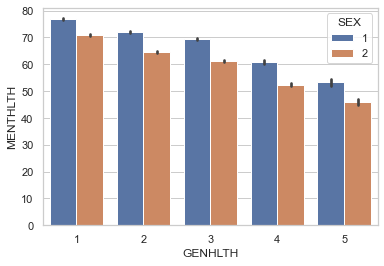

In [225]:
GEN = health_df.GENHLTH[health_df.GENHLTH < 7]
# Plotting counts of General Health survey results (1-Excellent to 5 - Poor)
# Separate by Gender
sns.barplot(x=GEN,y='MENTHLTH', data=health_df, hue='SEX')

# plt.savefig('GenSexStats.png')

#### BAR CHART (HOW MANY DAYS IN A MONTH DID YOU HAVE A MENTAL HEALTH PROBLEM?)

In [228]:
clean_ment.sample(10)

15    True
23    True
18    True
8     True
99    True
88    True
12    True
28    True
16    True
19    True
Name: MENTHLTH, dtype: bool

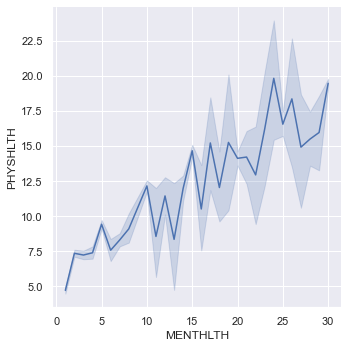

In [254]:
# Set seaborn style for dark background
sns.set(style="darkgrid")

# Lower BMI to correct Levels
clean_BMI = health_df.BMI / 100
# clean_ment = health_df.MENTHLTH[health_df.MENTHLTH < 66]
# RelPlot to determine relationship between BMI and Mental Health

sns.relplot(data=health_df, x=clean_ment, y=clean_phys, kind='line')

# plt.savefig('MentalHealthDays.png')

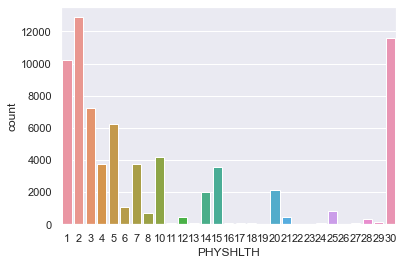

In [129]:
# Set seaborn style for dark background
sns.set(style="darkgrid")

# Clean data of irrelevant values
clean_phys = health_df.PHYSHLTH[health_df.PHYSHLTH < 66]

# Count plot for number of days physical health was not good according to individual.

sns.countplot(x=clean_phys, data=health_df)

# plt.savefig('PhysHealthStatus.png')

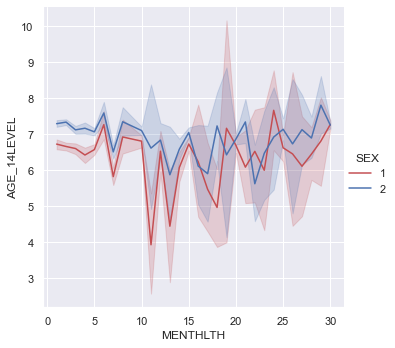

In [261]:
clean_age = health_df.AGE_14LEVEL[health_df.AGE_14LEVEL < 15]

sns.relplot(
    data = health_df, x=clean_ment, y=clean_age,hue='SEX', kind='line', palette=['r','b'])

# plt.savefig('MENTvPHYS.png')

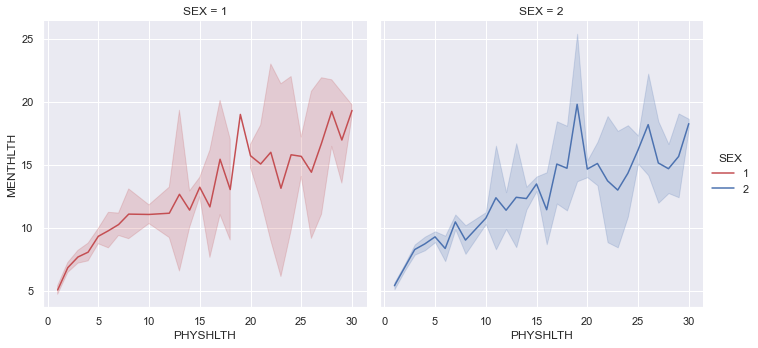

In [259]:
sns.relplot(
    data = health_df, x=clean_phys, y=clean_ment,col='SEX',hue='SEX',kind='line', palette=['r','b'])

# plt.savefig('MENTvPHYS.png')

<Figure size 864x576 with 0 Axes>

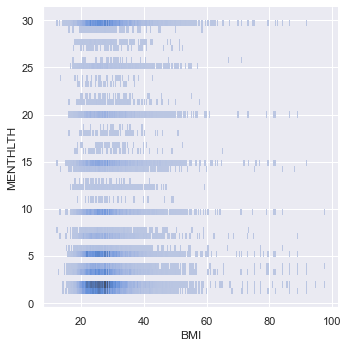

In [256]:
# Correlation matrix

plt.figure(figsize=(12,8))

sns.displot(data=health_df, x=clean_BMI,y=clean_ment)

## CLEANING SEPARATE SHEET FOR DASHBOARD ANALYSIS

In [153]:
clean_df = pd.read_csv('Analysis/2015_clean.csv')

In [154]:
clean_df.sample(10)

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,SEX,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3
259201,34,2.0,88.0,5,88.0,1,2,2.0,1,1.0,8.0,1.0,140.0,504.0
429531,56,3.0,88.0,14,88.0,1,2,2.0,7,88.0,7.0,2.0,136.0,503.0
248994,32,3.0,2.0,2,88.0,1,2,2.0,7,88.0,7.0,1.0,130.0,500.0
420165,54,4.0,1.0,88,88.0,1,1,1.0,7,88.0,6.0,2.0,180.0,508.0
373494,48,1.0,88.0,30,30.0,1,2,2.0,1,88.0,8.0,1.0,145.0,511.0
252736,33,4.0,10.0,5,2.0,1,2,2.0,1,88.0,5.0,1.0,220.0,504.0
411843,53,3.0,88.0,88,NaN,1,1,2.0,1,88.0,7.0,1.0,207.0,510.0
303175,39,2.0,88.0,7,88.0,1,2,2.0,1,2.0,8.0,1.0,151.0,507.0
426919,55,2.0,88.0,2,88.0,1,2,2.0,1,88.0,8.0,1.0,250.0,600.0
169188,24,3.0,88.0,88,NaN,1,2,2.0,7,88.0,5.0,1.0,200.0,501.0


In [155]:
# Making readable values for presentation purposes


clean_df['SEX'].replace([1,2],['M','F'], inplace=True)

clean_df['CHILDREN'].replace([88.0, 99.0], [0, 0], inplace=True)

clean_df['PHYSHLTH'].replace([88.0,77.0,99.0], [0,0,0], inplace=True)

clean_df['POORHLTH'].replace([88.0,77.0,99.0], [0,0,0], inplace=True)

clean_df['MENTHLTH'].replace([88.0,77.0], [0,0], inplace=True)

clean_df = clean_df[clean_df.MENTHLTH != 0]

clean_df.sample(10)

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,SEX,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3
21097,5,2.0,3.0,12,0.0,1,F,2.0,1,0.0,3.0,2.0,140.0,502.0
289406,37,4.0,0.0,99,0.0,1,F,2.0,7,0.0,99.0,2.0,176.0,500.0
44660,8,1.0,3.0,30,0.0,1,F,2.0,1,0.0,8.0,1.0,145.0,508.0
50976,9,1.0,4.0,99,0.0,1,M,2.0,1,2.0,99.0,1.0,165.0,600.0
105726,18,2.0,0.0,4,0.0,1,F,2.0,1,0.0,NaN,NaN,NaN,NaN
258333,34,2.0,10.0,4,2.0,1,M,1.0,1,3.0,7.0,1.0,170.0,504.0
165472,24,1.0,0.0,10,0.0,1,M,2.0,7,0.0,8.0,1.0,165.0,511.0
15924,4,3.0,0.0,30,20.0,2,M,1.0,1,0.0,6.0,1.0,180.0,509.0
240431,31,1.0,0.0,8,0.0,1,M,2.0,1,0.0,3.0,1.0,175.0,511.0
263493,34,2.0,0.0,30,0.0,1,M,1.0,1,0.0,8.0,1.0,250.0,511.0


In [156]:
poor_gen_hlth = clean_df[clean_df.GENHLTH == 5]

poor_gen_hlth.sample(10)

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,SEX,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3
370030,48,5.0,30.0,2,15.0,1,F,2.0,8,0.0,NaN,NaN,NaN,NaN
367978,48,5.0,30.0,30,30.0,1,M,1.0,7,0.0,1.0,1.0,250.0,601.0
39576,8,5.0,10.0,30,5.0,2,M,2.0,8,0.0,99.0,2.0,410.0,506.0
158107,23,5.0,30.0,25,20.0,1,M,2.0,7,0.0,1.0,1.0,185.0,508.0
275560,36,5.0,21.0,15,14.0,1,M,2.0,8,0.0,3.0,1.0,7777.0,502.0
338326,45,5.0,25.0,15,30.0,1,F,2.0,8,1.0,3.0,1.0,150.0,508.0
291068,37,5.0,30.0,15,0.0,1,M,2.0,8,0.0,77.0,1.0,215.0,600.0
139853,21,5.0,30.0,2,0.0,1,F,1.0,1,0.0,2.0,2.0,125.0,501.0
247589,32,5.0,30.0,30,30.0,1,F,2.0,7,0.0,1.0,2.0,125.0,410.0
345374,45,5.0,30.0,30,30.0,1,F,2.0,8,0.0,8.0,1.0,160.0,507.0


In [157]:
# Dictionary for labeling states

states = {1:'AL',
2:'AK',
4:'AZ',
5:'AR',
6:'CA',
8:'CO',
9:'CT',
10:'DL',
11:'DC',
12:'FL',
13:'GA',
15:'HI',
16:'ID',
17:'IL',
18:'IN',
19:'IA',
20:'KS',
21:'KY',
22:'LA',
23:'ME',
24:'MD',
25:'MS',
26:'MI',
27:'MN',
28:'MS',
29:'MO',
30:'MT',
31:'NE',
32:'NV',
33:'NH',
34:'NJ',
35:'NM',
36:'NY',
37:'NC',
38:'ND',
39:'OH',
40:'OK',
41:'OR',
42:'PA',
44:'RI',
45:'SC',
46:'SD',
47:'TN',
48:'TX',
49:'UT',
50:'VT',
51:'VA',
53:'WA',
54:'WV',
55:'WI',
56:'WY',
66:'GU',
72:'PR'}
          


In [158]:
# replace state numbers with names

state_df = clean_df.replace({'_STATE': states})

state_df

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,SEX,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3
0,AL,5.0,15.0,18,10.0,1,F,2.0,8,0.0,3.0,2.0,280.0,510.0
3,AL,5.0,30.0,30,30.0,1,F,2.0,8,1.0,8.0,2.0,180.0,507.0
6,AL,2.0,0.0,3,0.0,1,F,2.0,7,0.0,4.0,2.0,148.0,506.0
16,AL,5.0,30.0,30,30.0,1,F,2.0,8,0.0,1.0,1.0,200.0,508.0
24,AL,5.0,0.0,99,0.0,1,M,1.0,9,0.0,3.0,2.0,210.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441433,PR,5.0,0.0,30,30.0,1,M,2.0,7,0.0,99.0,2.0,185.0,507.0
441434,PR,1.0,0.0,5,0.0,1,M,2.0,1,0.0,5.0,1.0,280.0,600.0
441436,PR,5.0,0.0,15,0.0,1,F,2.0,7,0.0,4.0,2.0,145.0,504.0
441448,PR,3.0,4.0,14,0.0,1,M,2.0,1,1.0,8.0,1.0,270.0,507.0
